In [74]:
!pip install feature-engine

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('data.csv')

In [6]:
len(data[data['y']==0])#.head()
#len(data)

1242

In [7]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [8]:
print("max values for x1 {} and x2 {}".format(max(data['x1']),max(data['x2'])))
print("min values for x1 {} and x2 {}".format(min(data['x1']),min(data['x2'])))

max values for x1 134.5086874 and x2 99999999.0
min values for x1 -134.3691605 and x2 -134.8761321


In [9]:
data[data['x2']>135].sort_values(by=['x2'])

,x1,x2,y
1541,66.633331,99009998.0,0
2226,109.624009,99999999.0,0


In [10]:
# print("total number of records given in the data set is {}".format(len(data)))
print("percentage of records with label 0 in the data set is {}".format(len(data[data['y']==0])/len(data)*100))
print("percentage of records with label 1 in the data set is {}".format(len(data[data['y']==1])/len(data)*100))

percentage of records with label 0 in the data set is 55.77009429726088
percentage of records with label 1 in the data set is 44.22990570273911


### almost 56% of the records belong to label 0 and rest to label 1 

In [11]:
data.head()
len(data['x2'].unique())

1885

In [12]:
data['x2'].nlargest(3)

2226    1.000000e+08
1541    9.901000e+07
1948    1.349297e+02
Name: x2, dtype: float64

In [13]:
replcae_extreme = 1.349297e+02

In [14]:
data['x2'] = data['x2'].replace([99009998.0,99999999.0],replcae_extreme)

In [15]:
data['x2']

0       115.000000
1        97.777159
2       106.767654
3       101.195477
4       115.000000
           ...    
2222     89.643117
2223     91.000000
2224    103.839270
2225     78.605371
2226    134.929700
Name: x2, Length: 2227, dtype: float64

In [16]:
data[data['x2']>135].sort_values(by=['x2'])

,x1,x2,y


In [17]:
def plot_hist(data, feature, title):
    fig = data[feature].hist(bins=50)
    fig.set_title(title)


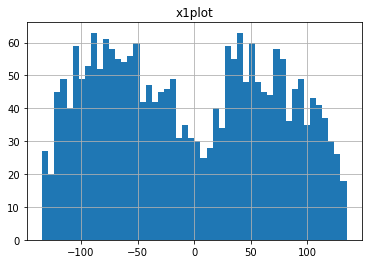

In [18]:
plot_hist(data, 'x1', 'x1plot')

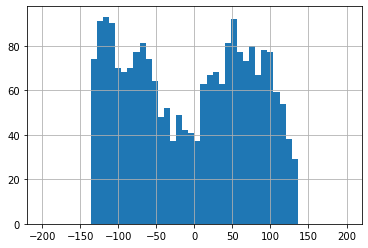

In [19]:
fig = data['x2'].hist(bins=50, range=(-200, 200))

In [20]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

x1 0.0022  % missing values
x2 0.0013  % missing values


In [21]:
data['x2'].isnull().sum()

3

In [22]:
data[data['x2'].isnull()]

,x1,x2,y
44,-99.627522,NaN,1
1092,55.162258,NaN,0
1430,-74.126054,NaN,0


In [23]:
def diagnostic_plots(df, variable):
   
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])#, ylim=(0,200))
    plt.ylim(-200, 200)
    plt.title('Boxplot')

    plt.show()

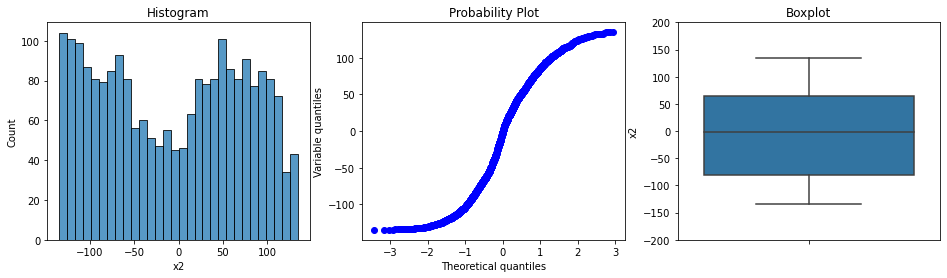

In [24]:
diagnostic_plots(data, 'x2')

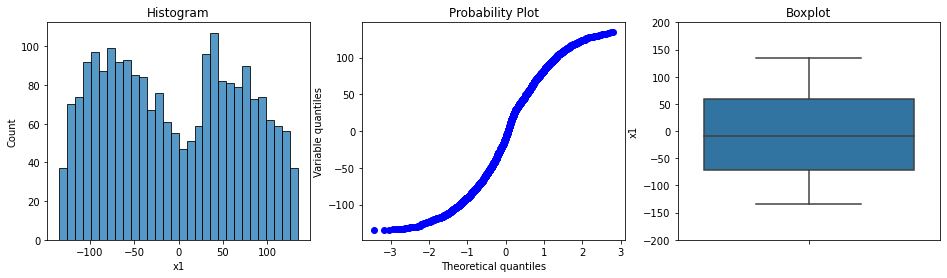

In [25]:
diagnostic_plots(data, 'x1')

In [26]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median')
imputer.fit(data)
data = imputer.transform(data)

In [27]:
cols_to_use = ['x1','x2']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['y'],
                                                    test_size=0.3,
                                                    random_state=42)


In [29]:
print(len(y_test[y_test==1]),len(y_test[y_test==0]))

306 363


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


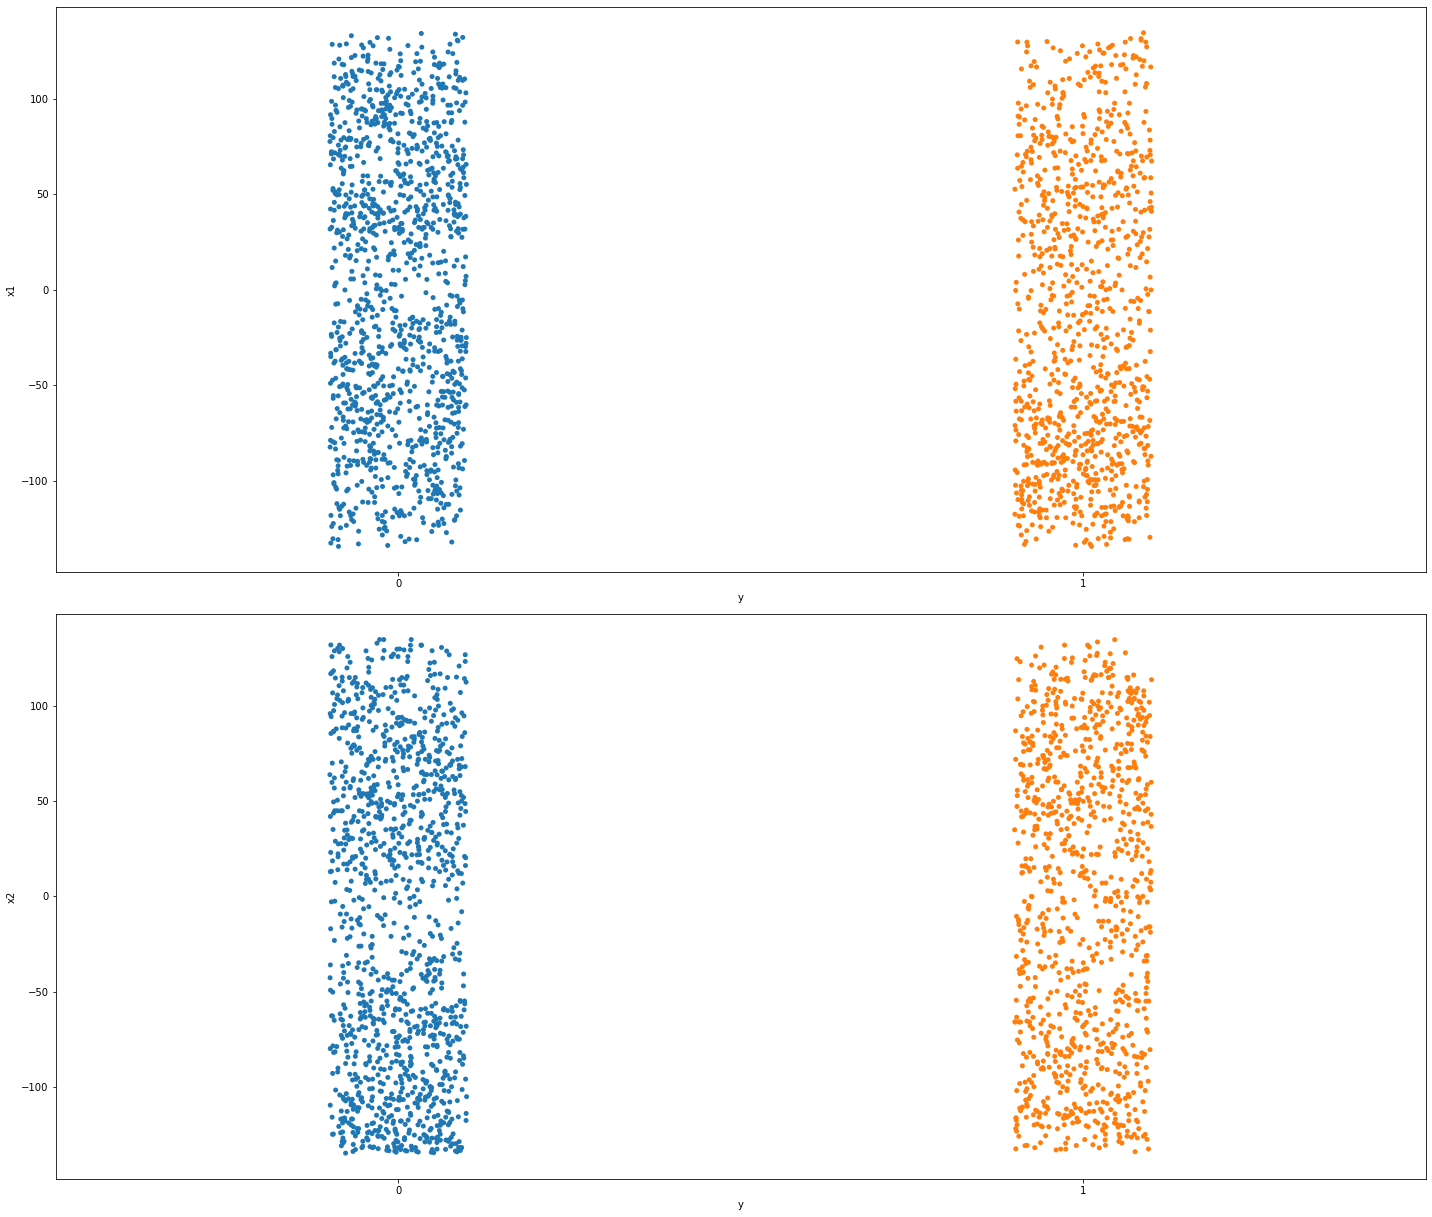

In [30]:
Xy = data.dropna()
X = data.drop(columns=['y'])
y = data['y']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Since the percentage of missing values is too less we can consider dropping those records, but I have gone about used imputation technique. 

In [31]:
# from feature_engine.imputation import MeanMedianImputer
# imputer = MeanMedianImputer(imputation_method='median')
# imputer.fit(X_train)

In [32]:
# X_train = imputer.transform(X_train)

In [33]:
# imputer.imputer_dict_
type(X_train)

pandas.core.frame.DataFrame

In [34]:
# imputer1 = MeanMedianImputer(imputation_method='median')
# imputer1.fit(X_test)
# X_test = imputer.transform(X_test)

# Logistic Regression

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [265]:
from sklearn.linear_model import LogisticRegression

In [266]:
log_model = LogisticRegression()

In [267]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [268]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [269]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.7234678624813154

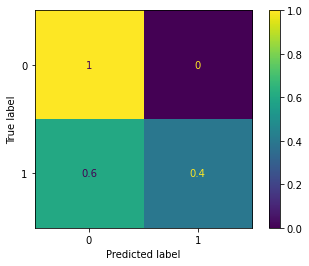

In [270]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

# Support Vector machines

In [271]:
from sklearn.svm import SVC

<AxesSubplot:xlabel='x1', ylabel='x2'>

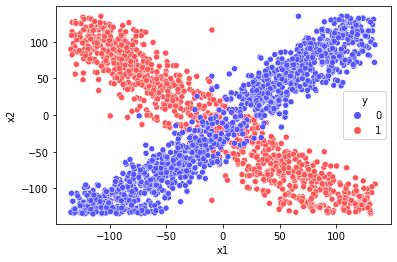

In [272]:
sns.scatterplot(x='x1',y='x2',hue='y',palette='seismic',data=data)

In [331]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [332]:
svc = SVC(random_state=42, kernel='linear')

In [333]:
param_grid = {'C':[0.01,0.1,0.5,1,20,100],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [334]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 20, 100],
                         'gamma': ['scale', 'auto']})

In [335]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale'}

In [336]:
grid_pred = grid.predict(scaled_X_test)

In [337]:
confusion_matrix(y_test,grid_pred)

array([[363,   0],
       [185, 121]], dtype=int64)

In [338]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       363
           1       1.00      0.40      0.57       306

    accuracy                           0.72       669
   macro avg       0.83      0.70      0.68       669
weighted avg       0.82      0.72      0.69       669



In [339]:
accuracy_score(y_test,grid_pred)

0.7234678624813154

## RBF kernel

In [318]:
svf = SVC(random_state=12, kernel='rbf')

In [319]:
param_grid1 = {'C':[0.01,0.1,0.5,1,20,100,120,135,200],'gamma':['scale','auto']}
grid1 = GridSearchCV(svf,param_grid1)

In [320]:
grid1.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(random_state=12),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 20, 100, 120, 135, 200],
                         'gamma': ['scale', 'auto']})

In [321]:
grid1.best_params_

{'C': 120, 'gamma': 'scale'}

In [322]:
grid_pred_f = grid1.predict(scaled_X_test)

In [327]:
confusion_matrix(y_test,grid_pred_f)

array([[346,  17],
       [  8, 298]], dtype=int64)

In [329]:
print(classification_report(y_test,grid_pred_f))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       363
           1       0.95      0.97      0.96       306

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



In [330]:
accuracy_score(y_test,grid_pred_f)

0.9626307922272048

# Decsion tree

In [343]:
from sklearn.tree import DecisionTreeClassifier

In [344]:
model = DecisionTreeClassifier()

In [345]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [346]:
from sklearn.tree import plot_tree

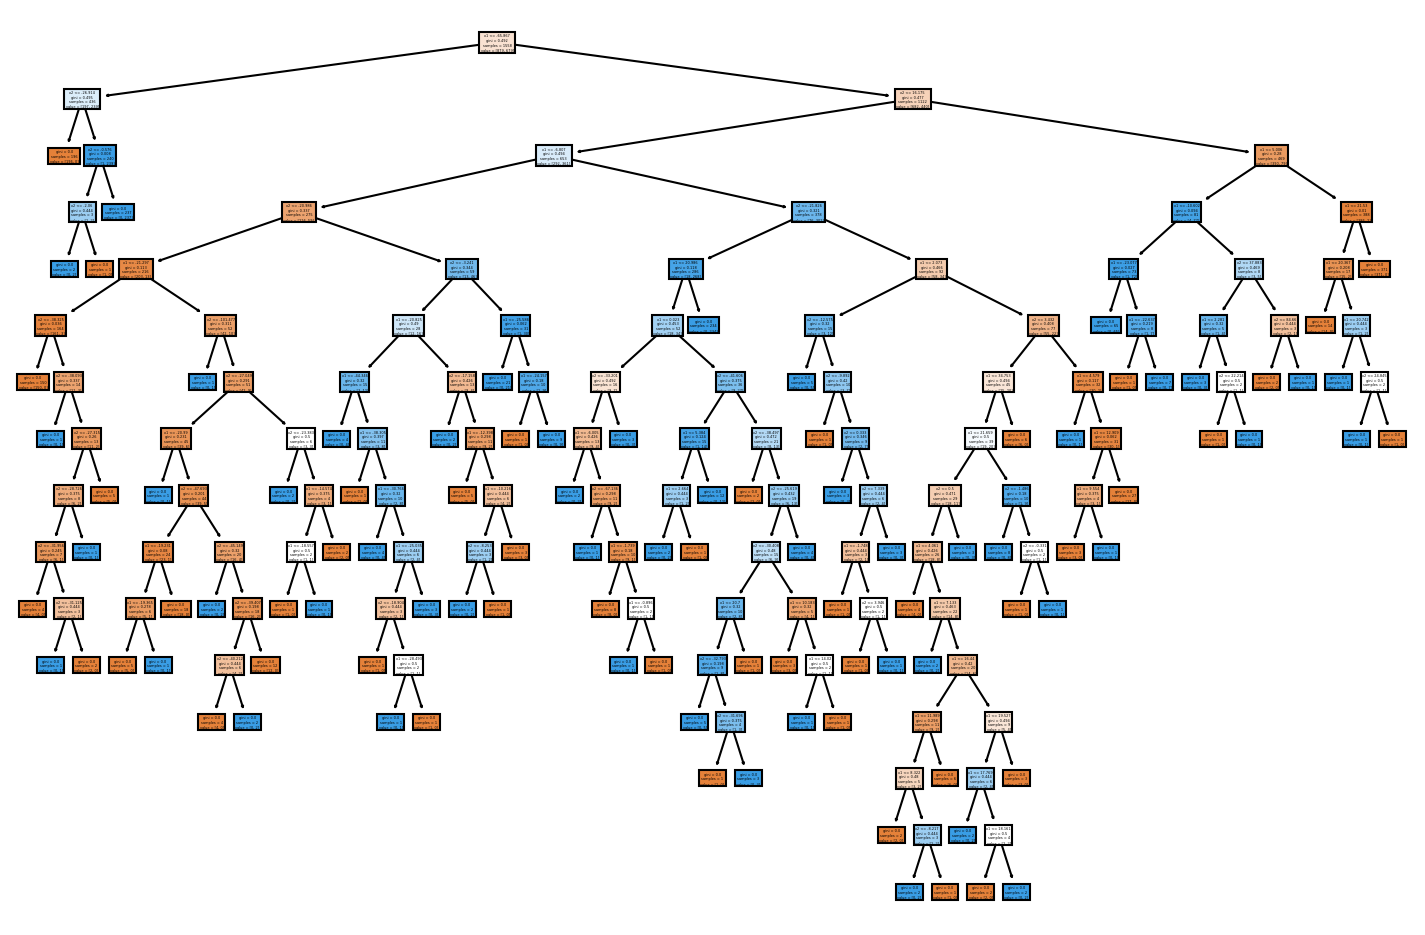

In [347]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=data.columns);

In [348]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       363
           1       0.93      0.95      0.94       306

    accuracy                           0.95       669
   macro avg       0.95      0.95      0.95       669
weighted avg       0.95      0.95      0.95       669





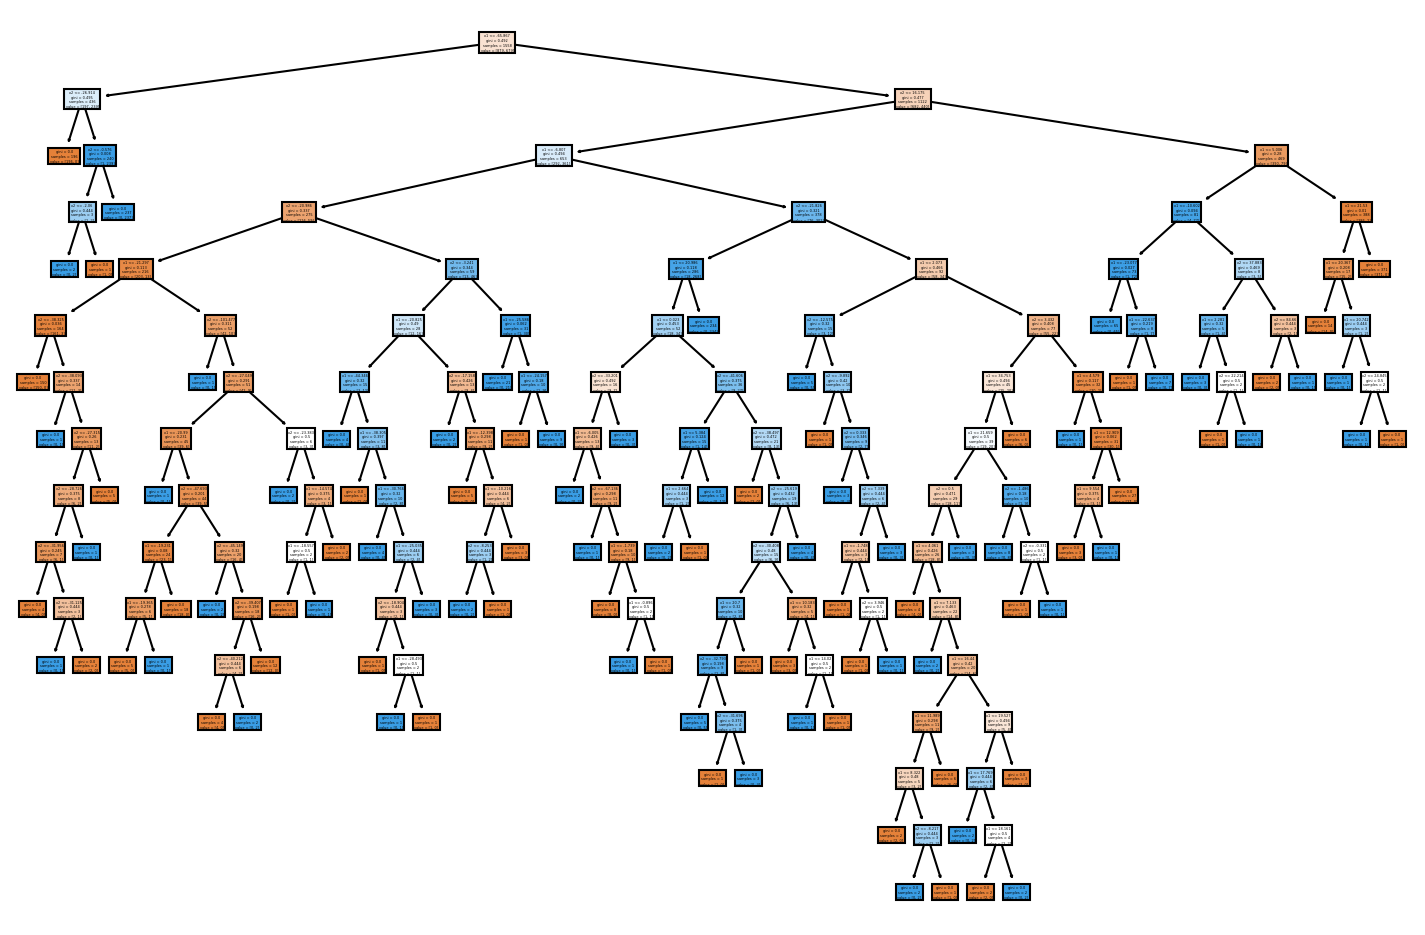

In [349]:
report_model(model)

In [350]:
from sklearn.neighbors import KNeighborsClassifier

In [351]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [353]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [354]:
y_pred = knn_model.predict(scaled_X_test)

In [355]:
accuracy_score(y_test,y_pred)

0.9566517189835575

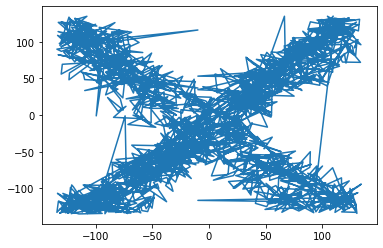

In [37]:
plt.plot(data['x1'],data['x2'])

In [39]:
from scipy.stats import pearsonr

In [41]:
corr, _ = pearsonr(data['x1'], data['x2'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.111


In [43]:
corr1, _ = pearsonr(data['x1'], data['y'])
corr2, _ = pearsonr(data['x1'], data['y'])

print('Pearsons correlation: x1 and y %.3f' % corr1)
print('Pearsons correlation: x2 and y%.3f ' % corr2)

Pearsons correlation: x1 and y -0.121
Pearsons correlation: x2 and y-0.121 


# As seen from above corerelation is way too less he4nce logistic regression fails badly in this sorts of data

# Compared to logistic regression and svm we can see thast knn and decision tree is giving better results it could be becauise of the fact that the data is not be linearly separable therefore knn and decision tree performs better